### Installation of Required Packages

To run the code in this notebook, we need to install the necessary packages. The following command installs package: `Sastrawi`.




In [ ]:
!pip install Sastrawi

### Importing Libraries and Modules

In this code cell, we import several libraries and modules that are necessary for performing various tasks related to text analysis and machine learning.

- **`WordCloud`**: It is a Python package for generating word clouds from text data.
- **`matplotlib.pyplot`**: This library is used for creating visualizations, such as plots and charts.
- **`pandas`**: It is a powerful data manipulation library in Python, primarily used for data analysis tasks.
- **`numpy`**: This library provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- **`csv`**: It provides functionality for reading and writing CSV files.
- **`nltk`**: The Natural Language Toolkit is a suite of libraries and programs for natural language processing tasks.
- **`re`**: This module provides regular expression matching operations.
- **`Sastrawi`**: It is a library for stemming Bahasa Indonesia words.
- **`CountVectorizer`**: It is used to convert a collection of text documents into a matrix of token counts.
- **`TfidfTransformer`**: This transformer is used to transform a count matrix to a normalized term-frequency or term-frequency times inverse document-frequency representation.
- **`train_test_split`**: This function is used to split arrays or matrices into random train and test subsets.
- **`classification_report`, `confusion_matrix`, `ConfusionMatrixDisplay`, `accuracy_score`**: These are utility functions from scikit-learn for evaluating classification models.
- **`SVC`**: It is a support vector classifier from scikit-learn.
- **`TreebankWordDetokenizer`**: This class is used to detokenize tokens into text.

These libraries and modules are essential for the text analysis and machine learning tasks that we'll perform later in the notebook.


In [ ]:
from ntscraper import Nitter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv, nltk, re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.svm import SVC
from nltk.tokenize.treebank import TreebankWordDetokenizer

### Downloading NLTK Resources and Setting Pandas Display Option

In this code cell, we perform two essential tasks related to natural language processing (NLP) and data display settings.

- **`nltk.download('punkt')`**: This command downloads the necessary resources for NLTK's word tokenization. Word tokenization is the process of splitting text into individual words or tokens. These resources are required to use NLTK's `word_tokenize()` function effectively.

- **`nltk.download('stopwords')`**: This command downloads a list of common stopwords for various languages. Stopwords are words that are commonly used in a language but do not carry significant meaning, such as "the," "is," "and," etc. These stopwords are often removed from text data during preprocessing to improve the performance of NLP tasks.

- **`pd.set_option('display.max_colwidth', None)`**: This command sets the Pandas display option to show the full content of each column in DataFrames without truncation. By setting `max_colwidth` to `None`, we ensure that long text columns are displayed entirely, allowing us to view the complete text content without truncation.

These commands are essential for ensuring that our NLP tasks can tokenize text effectively and that we can view the complete text content when working with Pandas DataFrames.


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Mounting Google Drive

This code cell mounts Google Drive to the Colab environment. Mounting Google Drive allows to access files and directories stored in Google Drive directly from Colab notebook.

- **`from google.colab import drive`**: This line imports the necessary module from the `google.colab` package to mount Google Drive.

- **`drive.mount("/content/drive")`**: This command mounts Google Drive to the Colab runtime. When run this cell, it'll be prompted to authenticate and authorize access to Google Drive. Once mounted, Google Drive will be accessible under the `/content/drive` directory in the Colab environment.

Mounting Google Drive is useful for accessing datasets, scripts, or other files stored in Google Drive and incorporating them into Colab notebook workflow.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading Dataset from Google Drive

This code cell loads a dataset from Google Drive into the Colab environment.

- **`pd.read_csv('file_path')`**: This line uses the Pandas `read_csv()` function to read a CSV file located in Google Drive. The file path `/content/drive/MyDrive/dataset_tweet_sentiment_cellular_service_provider.csv` specifies the location of the CSV file in Google Drive. Replace this path with the actual path to dataset file.

- **`data.head()`**: After loading the dataset into a Pandas DataFrame named `data`, this line displays the first few rows of the DataFrame using the `head()` function. Viewing the first few rows allows to inspect the structure and contents of the dataset.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset_tweet_sentiment_cellular_service_provider.csv')
data.head()

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>"
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja <URL>
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


### Visualizing Sentiment Distribution

This code cell creates a bar plot to visualize the distribution of sentiment labels in the dataset. The plot displays the frequency of each sentiment label, with sentiments represented on the x-axis and their corresponding counts on the y-axis. The red and green colors distinguish between different sentiment categories. This visualization provides a quick overview of the distribution of sentiment labels in the dataset.


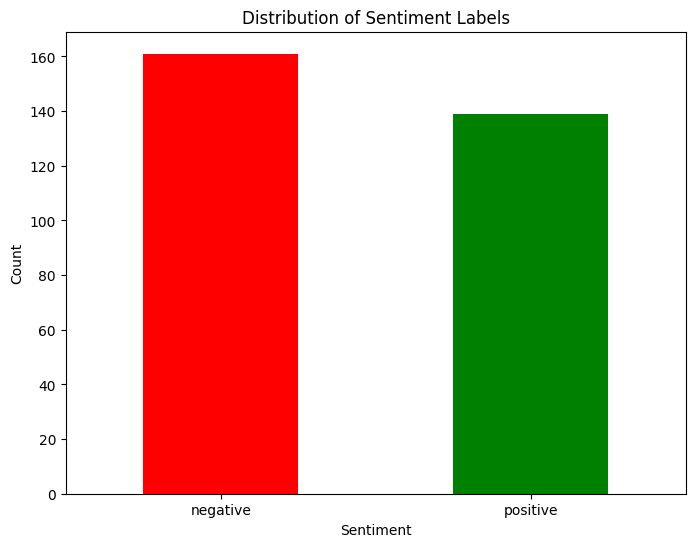

In [ ]:
plt.figure(figsize=(8, 6))
data['Sentiment'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The sentiment analysis model reveals that 46.33% of tweets express positive sentiment towards the cellular service provider, while 53.67% are negative in the dataset of 300 tweets


### Converting Text to Lowercase

This code cell converts the text in the 'Text Tweet' column of the DataFrame to lowercase. By applying the `.str.lower()` method, all text within the column is transformed to lowercase letters. This preprocessing step is commonly used in natural language processing tasks to standardize the text data, making it easier to process and analyze.


In [ ]:
data['Text Tweet'] = data['Text Tweet'].str.lower()
print(data['Text Tweet'].head())

0                                         <user_mention> #boikot_<provider_name> gunakan produk bangsa sendiri <provider_name>
1                                                                        saktinya balik lagi, alhamdulillah :v <provider_name>
2    selamat pagi <provider_name>  bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja  <url>
3                                                   dear <provider_name> akhir2 ini jaringan data lemot banget padahal h+ !!!!
4                                                                                      selamat malam pendusta <provider_name> 
Name: Text Tweet, dtype: object


### Text Cleaning Function

This function, `clean_text`, performs several text cleaning operations on input text:

- **Removing URLs**: It removes URLs and website addresses from the text.
- **Removing Usernames**: It removes Twitter usernames (starting with '@') from the text.
- **Removing Extra White Spaces**: It removes additional white spaces to normalize the text.
- **Removing Hashtags**: It removes hashtags from the text.
- **Removing Retweet Tags**: It removes 'rt', typically found in retweets.
- **Removing Punctuation**: It removes punctuation marks from the text.
- **Removing Numbers**: It removes numerical digits from the text.
- **Removing Specific Words**: It removes specific words like 'user', 'mention', 'provider', 'name', 'product', and 'url' from the text.

After applying these cleaning operations, the function returns the cleaned text. This function is then applied to the 'Text Tweet' column of the DataFrame using the `.apply()` method, and the cleaned text is stored in a new column named 'Cleaned'. Finally, the first few rows of the cleaned text are printed for inspection.


In [ ]:
def clean_text(text):
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Remove website
    text = re.sub(r'@[^\s]+', ' ', text) # Remove username
    text = re.sub(r'[\s]+', ' ', text) # Remove additional white spaces
    text = re.sub(r'#([^\s]+)', ' ', text) # Remove hashtags
    text = re.sub(r'rt', ' ', text) # Remove retweet
    text = re.sub(r'[^\w\s]+', ' ', text) # Remove punctuation
    text = re.sub(r'\d', ' ', text) # Remove numbers
    text = re.sub(r'[^\w\s]|_', ' ', text) # Remove underscore

    words_to_remove = ['user', 'mention', 'provider', 'name', 'product', 'url'] # Remove specific words
    for word in words_to_remove:
        text = text.replace(word, '')

    return text

data['Cleaned'] = data['Text Tweet'].apply(clean_text)
print(data['Cleaned'].head())

0                                                                           gunakan produk bangsa sendiri    
1                                                                   saktinya balik lagi  alhamdulillah  v    
2    selamat pagi     bisa bantu kenapa di dalam kamar sinyal  g hilang yang   lagi panggilan darurat saja   
3                                                 dear     akhir  ini jaringan data lemot banget padahal h   
4                                                                                 selamat malam pendusta     
Name: Cleaned, dtype: object


### Tokenizing Cleaned Text

This code cell tokenizes the cleaned text data in the 'Cleaned' column of the DataFrame. Tokenization is the process of splitting text into individual words or tokens. The `.apply(word_tokenize)` method applies the `word_tokenize` function from NLTK to each row of the 'Cleaned' column, splitting the text into a list of tokens (words).

The tokenized text is then stored in a new column named 'Tokenized'. The printed output displays the first few rows of tokenized text, showing how the cleaned text has been split into individual tokens or words for further analysis.


In [ ]:
data['Tokenized'] = data['Cleaned'].apply(word_tokenize)
print(data['Tokenized'].head())

0                                                                                 [gunakan, produk, bangsa, sendiri]
1                                                                          [saktinya, balik, lagi, alhamdulillah, v]
2    [selamat, pagi, bisa, bantu, kenapa, di, dalam, kamar, sinyal, g, hilang, yang, lagi, panggilan, darurat, saja]
3                                                      [dear, akhir, ini, jaringan, data, lemot, banget, padahal, h]
4                                                                                         [selamat, malam, pendusta]
Name: Tokenized, dtype: object


### Normalizing Text with Formal Equivalents

This function, `normalize_text`, normalizes text by replacing slang or colloquial words with their formal equivalents. It operates on a list of tokens as input.

- **Loading Slang Dictionary**: The function reads a slang dictionary from the specified URL (`https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv`) using Pandas' `read_csv` function. This dictionary contains mappings between slang words and their formal equivalents.

- **Replacing Slang with Formal Equivalents**: It creates a dictionary `slang_to_formal` from the loaded DataFrame, where keys are slang words and values are their formal equivalents. It then iterates through the input tokens and replaces slang tokens with their corresponding formal equivalents using a list comprehension and the `get` method of dictionaries.

- **Storing Normalized Tokens**: The normalized tokens are stored in a new column named 'Normalized' in the DataFrame.


This function is useful for standardizing text data by replacing informal language with formal equivalents, which can improve the accuracy of natural language processing tasks.


In [ ]:
def normalize_text(tokens):
    kamus = 'https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv'
    data = pd.read_csv(kamus)
    slang_to_formal = dict(zip(data['slang'], data['formal']))
    normalized_tokens = [slang_to_formal.get(token, token) for token in tokens]
    return normalized_tokens

data['Normalized'] = data['Tokenized'].apply(normalize_text)
print(data['Normalized'].head())

0                                                                                      [gunakan, produk, bangsa, sendiri]
1                                                                               [saktinya, balik, lagi, alhamdulillah, v]
2    [selamat, pagi, bisa, bantu, kenapa, di, dalam, kamar, sinyal, enggak, hilang, yang, lagi, panggilan, darurat, saja]
3                                                           [dear, akhir, ini, jaringan, data, lemot, banget, padahal, h]
4                                                                                              [selamat, malam, pendusta]
Name: Normalized, dtype: object


### Removing Stop Words

This code cell removes stop words from the normalized tokens in the 'Normalized' column of the DataFrame. Stop words are common words in a language (such as 'the', 'is', 'and') that are often filtered out from text data because they carry little or no meaningful information for analysis.

- **Loading Stop Words**: It loads the Indonesian stop words list using NLTK's `stopwords.words('indonesian')` function and converts it to a set for efficient lookup.

- **Removing Stop Words**: It applies a lambda function to each row of normalized tokens in the 'Normalized' column. The lambda function iterates through the tokens and filters out those that are not in the set of stop words, effectively removing them from the text.

- **Storing Stopword-Free Tokens**: The resulting stop word-free tokens are stored in a new column named 'Stopword' in the DataFrame.


Removing stop words is a common preprocessing step in natural language processing tasks to improve the quality of text analysis by eliminating noise and reducing dimensionality.


In [ ]:
stop_words = set(stopwords.words('indonesian'))
data['Stopword'] = data['Normalized'].apply(lambda tokens: [token for token in tokens if token not in stop_words])
print(data['Stopword'].head())

0                                                     [produk, bangsa]
1                                         [saktinya, alhamdulillah, v]
2    [selamat, pagi, bantu, kamar, sinyal, hilang, panggilan, darurat]
3                             [dear, jaringan, data, lemot, banget, h]
4                                           [selamat, malam, pendusta]
Name: Stopword, dtype: object


### Stemming and Lemmatization

This function, `stem_and_lemmatize`, applies stemming and lemmatization to the tokenized text data. Stemming is the process of reducing words to their root form, while lemmatization is the process of converting words to their base or dictionary form.

- **Initializing Stemmer and Lemmatizer**: It initializes an Indonesian stemmer and lemmatizer using the `StemmerFactory` and `StopWordRemoverFactory` classes from the Sastrawi library, respectively.

- **Stemming and Lemmatization**: It applies the stemmer and lemmatizer to each token in the input tokens using a list comprehension. For each token, it first applies stemming to obtain the root form and then applies lemmatization to further normalize the word.

- **Storing Stemmed and Lemmatized Tokens**: The stemmed and lemmatized tokens are stored in a new column named 'Stemmed' in the DataFrame.

Stemming and lemmatization are preprocessing techniques commonly used in natural language processing to normalize text data and reduce vocabulary size, which can improve the performance of text analysis tasks.


In [ ]:
def stem_and_lemmatize(tokens):
    stemmer = StemmerFactory().create_stemmer()
    lemmatizer = StopWordRemoverFactory().create_stop_word_remover()

    stemmed_and_lemmatized = [lemmatizer.remove(stemmer.stem(token)) for token in tokens]
    return stemmed_and_lemmatized

data['Stemmed'] = data['Stopword'].apply(stem_and_lemmatize)
print(data['Stemmed'].head())

0                                                   [produk, bangsa]
1                                          [sakti, alhamdulillah, v]
2    [selamat, pagi, bantu, kamar, sinyal, hilang, panggil, darurat]
3                               [dear, jaring, data, lot, banget, h]
4                                            [selamat, malam, dusta]
Name: Stemmed, dtype: object


### Filtering Tokens by Length

This code cell filters the stemmed and lemmatized tokens in the 'Stemmed' column of the DataFrame based on their lengths. It retains only tokens with lengths between 4 and 25 characters, inclusively.

- **Applying Length Filter**: It applies a lambda function to each row of stemmed and lemmatized tokens in the 'Stemmed' column. The lambda function iterates through the tokens and filters out those whose lengths are not within the specified range (4 to 25 characters), using a list comprehension.

- **Storing Filtered Tokens**: The resulting filtered tokens are stored in a new column named 'Cutted' in the DataFrame.

Filtering tokens by length can help remove very short or very long tokens that may not contribute much to the analysis or modeling tasks.


In [ ]:
data['Cutted'] = data['Stemmed'].apply(lambda tokens: [token for token in tokens if 4 <= len(token) <= 25])
print(data['Cutted'].head())

0                                                   [produk, bangsa]
1                                             [sakti, alhamdulillah]
2    [selamat, pagi, bantu, kamar, sinyal, hilang, panggil, darurat]
3                                       [dear, jaring, data, banget]
4                                            [selamat, malam, dusta]
Name: Cutted, dtype: object


### Detokenizing Tokens

This code cell detokenizes the filtered tokens in the 'Cutted' column of the DataFrame, combining them back into sentences or text data.

- **Applying Detokenization**: It applies a lambda function to each row of filtered tokens in the 'Cutted' column. The lambda function uses the `TreebankWordDetokenizer` class from NLTK to detokenize the tokens, reconstructing them into coherent sentences or text data.

- **Storing Detokenized Text**: The detokenized text is stored in the 'Cleaned' column in the DataFrame.

Detokenization is an important step in the preprocessing pipeline, especially after tokenization and filtering, to reconstruct the text data in a format suitable for further analysis or modeling.


In [ ]:
data['Cleaned'] = data['Cutted'].apply(lambda tokens: TreebankWordDetokenizer().detokenize(tokens))
print(data['Cleaned'].head())

0                                             produk bangsa
1                                       sakti alhamdulillah
2    selamat pagi bantu kamar sinyal hilang panggil darurat
3                                   dear jaring data banget
4                                       selamat malam dusta
Name: Cleaned, dtype: object


### Text Classification with Support Vector Classifier (SVC)

This code cell performs text classification using the Support Vector Classifier (SVC) algorithm. The following steps are involved:

- **Handling Missing Values**: It drops rows with missing values in the 'Sentiment' column using `dropna()` method.

- **Converting Sentiment Labels**: It converts sentiment labels from categorical values ('negative' and 'positive') to numeric values (0 and 1) using the `map()` method.

- **Feature Extraction**: It extracts features from the cleaned text data using the `CountVectorizer()` class from scikit-learn. The text data is transformed into a matrix of token counts.

- **Feature Transformation**: It transforms the feature matrix using Term Frequency-Inverse Document Frequency (TF-IDF) representation using the `TfidfTransformer()` class.

- **Train-Test Split**: It splits the data into training and testing sets using the `train_test_split()` function from scikit-learn.

- **Training the Classifier**: It trains the Support Vector Classifier (SVC) model on the training data using the `fit()` method.

- **Making Predictions**: It makes predictions on the test data using the trained classifier and stores the predicted labels in the variable `y_pred`.

The trained classifier is then ready to predict sentiment labels for new text data based on the learned patterns from the training set.


In [ ]:
data = data.dropna(subset=['Sentiment'])

# Convert sentiment labels to numeric values
data['Sentiment'] = data['Sentiment'].map({"negative": 0, "positive": 1})

# Extract features and labels
cv = CountVectorizer()
x = cv.fit_transform(data['Cleaned'].tolist()).toarray()
y = data['Sentiment'].values

# Transform features using TF-IDF
tfidf = TfidfTransformer()
x_tfidf = tfidf.fit_transform(x).toarray()

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=0)

# Train the classifier
classifier = SVC(random_state=0)
classifier.fit(x_train, y_train)

# Make predictions
y_pred = classifier.predict(x_test)

### Evaluating Model Performance

This code cell evaluates the performance of the trained text classification model using the following steps:

- **Confusion Matrix**: It calculates the confusion matrix based on the true labels (`y_test`) and the predicted labels (`y_pred`) using the `confusion_matrix()` function from scikit-learn.

- **Displaying Confusion Matrix**: It plots the confusion matrix using the `ConfusionMatrixDisplay()` class from scikit-learn and the `plot()` method. The confusion matrix provides a visual representation of the model's performance by showing the counts of true positive, false positive, true negative, and false negative predictions.

- **Classification Report**: It generates a classification report using the `classification_report()` function from scikit-learn. The classification report includes metrics such as precision, recall, F1-score, and support for each class (positive and negative). It provides a detailed summary of the model's performance on both classes.

The confusion matrix and classification report help assess the effectiveness of the text classification model in predicting sentiment labels and identify any areas for improvement.

**The accuracy is 82%.**

Improving the quality of provisioning data and the performance of the model involves several strategies. Firstly, data quality can be enhanced through rigorous data cleaning and preprocessing techniques. This includes removing noise such as irrelevant characters, URLs, and special characters, as well as addressing misspellings and variations. Augmenting the dataset with synthetic data generated through techniques like back translation or paraphrasing can also enrich the dataset. Balancing the dataset by addressing class imbalances and conducting feature engineering to extract more informative features, such as n-grams or sentiment scores, further enhances data quality.

On the model side, choosing the right algorithm is crucial. Experimenting with different classification algorithms, such as Random Forest or Gradient Boosting, can help identify the most suitable model for the task. Fine-tuning hyperparameters through techniques like grid search or random search optimizes model performance. Ensuring model interpretability using techniques like feature importance analysis or SHAP values enhances transparency and trust in the model's predictions. Ensemble learning methods, which combine multiple models, can leverage the strengths of individual models and improve overall performance.

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        36
           1       0.84      0.67      0.74        24

    accuracy                           0.82        60
   macro avg       0.82      0.79      0.80        60
weighted avg       0.82      0.82      0.81        60



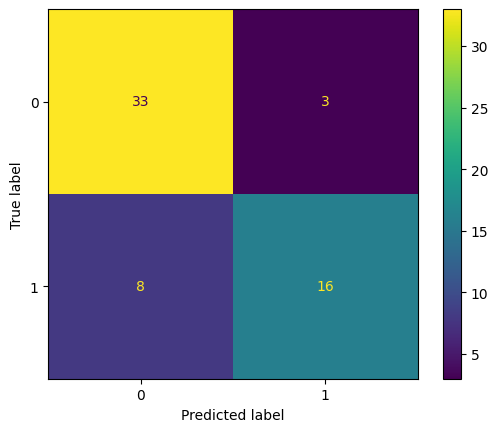

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(matrix).plot()
print(classification_report(y_test, y_pred))

### Word Cloud Visualization

This function, `plot_wordCloud`, generates a word cloud visualization based on the frequency of words in the input text data. It utilizes the `WordCloud` class from the `wordcloud` library to create the visualization.

- **Input Parameters:**
  - `words`: A string containing all the words from the input text data.

- **Word Cloud Configuration:**
  - The word cloud is configured with a width of 800 pixels, a height of 500 pixels, and a white background color.
  - The `random_state` parameter ensures reproducibility of the word cloud.
  - The `max_font_size` parameter sets the maximum font size for the most frequent words in the cloud.

- **Displaying the Word Cloud:**
  - The generated word cloud is displayed using Matplotlib's `imshow` function within a figure of size 10x7 inches.
  - The `interpolation='bilinear'` parameter ensures smooth rendering of the word cloud.
  - The axes are turned off using `plt.axis('off')` to focus solely on the word cloud visualization.

This visualization provides a visually appealing representation of the most frequent words in the text data, with larger words indicating higher frequency.


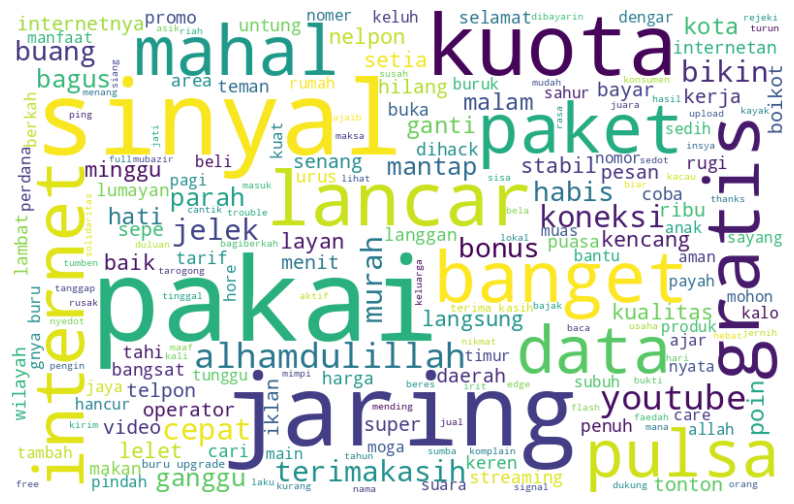

In [ ]:
def plot_wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

all_words = ' '.join([text for text in data['Cleaned']])
plot_wordCloud(all_words)

### Visualizing Negative Sentiment Words with Word Cloud

This code snippet generates a word cloud visualization specifically for words associated with negative sentiment. It first collects all the cleaned text data corresponding to negative sentiment labels from the DataFrame. Then, it joins these words into a single string.

The `plot_wordCloud` function is then called with the `negative_words` string as input. This function generates a word cloud visualization based on the frequency of words in the `negative_words` string.

The resulting word cloud provides a visual representation of the most frequent words associated with negative sentiment in the text data. Larger words indicate higher frequency, offering insights into the prevailing negative sentiments within the dataset.



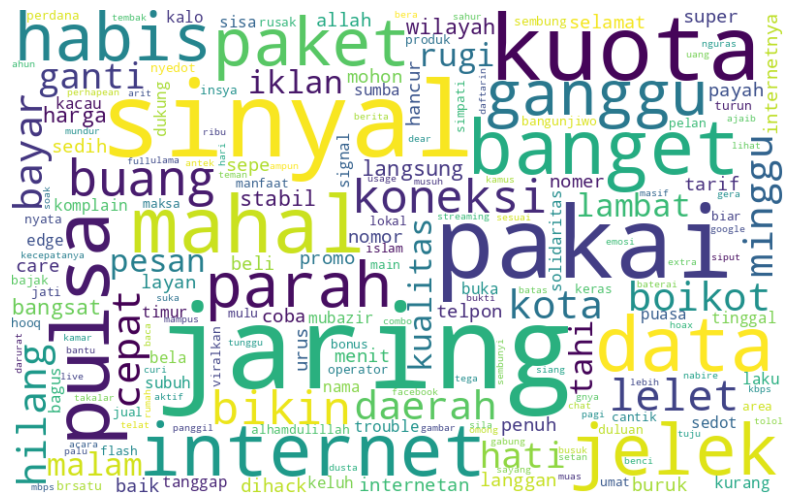

In [ ]:
negative_words = ' '.join(text for text in data['Cleaned'][data['Sentiment'] == 0])
plot_wordCloud(negative_words)

Based on the negative word cloud:
1. Complaints about network outages, dropped calls, and slow internet speeds.
2. Frustration over billing issues, unexpected charges, or poor customer service experiences.

### Visualizing Positive Sentiment Words with Word Cloud

This code snippet generates a word cloud visualization specifically for words associated with positive sentiment. It collects all the cleaned text data corresponding to positive sentiment labels from the DataFrame and joins these words into a single string.

The `plot_wordCloud` function is then called with the `positive_words` string as input. This function generates a word cloud visualization based on the frequency of words in the `positive_words` string.

The resulting word cloud offers a visual representation of the most frequent words associated with positive sentiment in the text data. Larger words indicate higher frequency, providing insights into the prevailing positive sentiments within the dataset.



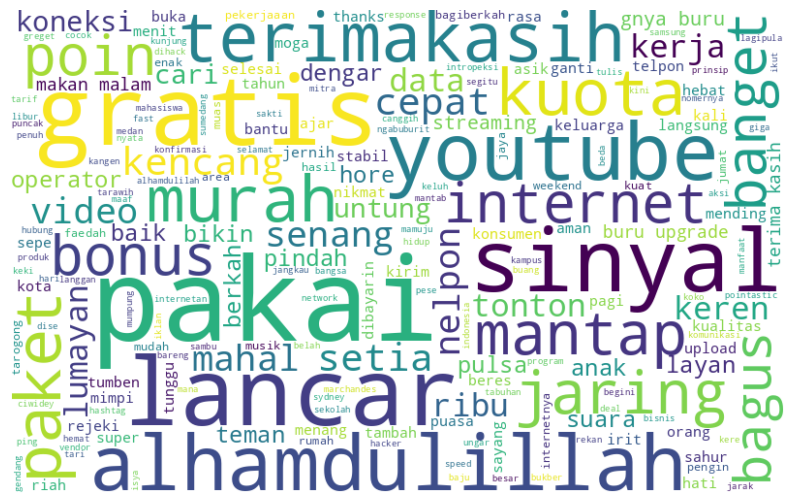

In [ ]:
positive_words = ' '.join(text for text in data['Cleaned'][data['Sentiment'] == 1])
plot_wordCloud(positive_words)

Based on the positive word cloud:
1. Tweets praising the provider's excellent network coverage, fast internet speeds, and reliable service.
2. Customers expressing satisfaction with the provider's responsive customer support and helpful assistance.